In [106]:
import requests
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import re
import datetime 
from konlpy.tag import Hannanum
from config import * # config안의 정보 가져오기
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [10]:
def resp_data (url, query, headers, ELASTIC_SEARCH_AUTH, type):
    '''type for POST, GET ... '''

    resp = requests.get(
        url,
        data=query.encode('utf-8'),
        headers=headers,
        auth = ELASTIC_SEARCH_AUTH
    )

    order = type

    return requests.order(url, data=query, headers=headers, auth = ELASTIC_SEARCH_AUTH).json()

In [227]:
def get_today_stock_news_data_list (ticker_name):

    #start_time = datetime.datetime.today().strftime("%Y-%m-%dT00:00:00")
    #end_time = datetime.datetime.today().strftime("%Y-%m-%dT23:59:59") 이건 오늘 날짜로 따질때 이야기

    start_time = "2022-04-05T00:00:00"
    end_time = "2022-04-05T23:59:59"


    headers = {
    'Content-Type': 'application/json'
    }

    url = f"{ELASTIC_SEARCH_URL}/news/_count"

    query=f'''{{
    "query": {{
      "bool": {{
        "must": [
          {{
            "match": {{
              "body": "{ticker_name}"
            }}
          }},
          {{
            "range": {{
              "created_at": {{
               "gte": "{start_time}",
               "lte": "{end_time}"
              }}
            }}
          }}
        ]
      }}
    }}
    }}'''

    count = int(requests.get(url, data=query.encode('utf-8'), headers=headers, auth = ELASTIC_SEARCH_AUTH).json()['count'])

    if count != 0:

      url = f"{ELASTIC_SEARCH_URL}/news/_search"

      query=f'''{{
      "size": {count},
      "query": {{
        "bool": {{
          "must": [
            {{
              "match": {{
                "body": "{ticker_name}"
              }}
            }},
            {{
              "range": {{
                "created_at": {{
                "gte": "{start_time}",
                "lte": "{end_time}"
                }}
              }}
            }}
          ]
        }}
      }}
      }}'''  

      resp = requests.get(url, data=query.encode('utf-8'), headers=headers, auth = ELASTIC_SEARCH_AUTH).json()

      resp = resp['hits']['hits']
    
    else:

      resp = []


    return resp



In [88]:
def clean_doc (doc):
    
    doc = re.sub(r'[^\wㄱ-ㅎ가-힣]', ' ', doc)
    doc = re.sub('  ', ' ', doc)
    doc = re.sub('  ', ' ', doc)

    return doc

In [1]:
def title_extract(doc):
    
    return doc['_source']['title']

In [93]:
def body_extract (doc):

    return doc['_source']['body']

In [3]:
stock1_doc_list = get_today_stock_news_data_list("삼성전자")
stock1_doc_list[0:4]

NameError: name 'get_today_stock_news_data_list' is not defined

In [91]:
stock1_doc_list[0]['_source']['body']

'“반도체 수퍼사이클(장기 상승장)이라고 해서 샀는데 계속 물타다가 대주주 되겠어요. 이번에 실적 발표를 보고 추매와 손절 중에 선택하려고요.”(50대 투자자 이모씨)\n오는 7일 삼성전자의 1분기(1~3월) 실적 발표일을 앞두고, 500만 삼성전자 소액 주주들이 초긴장 모드다. 삼성전자 주가가 5일 6만9200원까지 주저앉은 가운데, 1분기 실적 발표를 보면서 향후 투자의 방향을 결정하려는 것이다.\n이날 한국거래소에 따르면, 올해 개인 투자자들은 삼성전자 주식을 6조5000억원 어치 사모았다. 삼성전자 우선주까지 합하면 7조원이 넘는다. 같은 기간 연기금 등 기관은 삼성전자 주식을 5조원 넘게 팔아 치웠고, 외국인도 1조원 넘게 순매도했다.\n개인들은 삼성전자 주가가 6만원대로 떨어진 3월에만 3조8000억원 어치 순매수했다. 나머지 2~10위 종목들의 순매수 금액을 다 합해도 삼성전자 한 종목에 미치지 못한다.\n/그래픽=이연주 조선디자인랩 기자\n개인 투자자들이 주목하고 있는 삼성전자의 1분기 실적 전망은 어떨까? 이달 초 금융정보업체 에프앤가이드가 집계한 자료에 따르면, 삼성전자 1분기 실적에 대한 증권사 전망치(컨센서스)는 매출액 75조823억원, 영업이익은 13조283억원이다. 증권가 예상이 맞다면, 삼성전자는 1분기 기준으로 매출 70조원 시대를 처음 열게 된다.\n1분기 호실적 발표가 예상되고 있지만 주가 흐름은 영 신통치 않다. 지난 4일 삼성전자 종가는 6만9300원. 올해 들어서만 12% 하락했다. 작년 초만 해도 ‘반도체 수퍼사이클’ 전망이 나오면서 주가는 9만원을 돌파해 10만원 턱밑까지 올랐지만, 1년여 만에 6만원대로 밀려 버렸다.\n편득현 NH투자증권 WM마스터즈 전문위원은 “삼성전자는 한국 증시에 대한 비중을 낮추는 연기금과 외국인들의 집중 타깃이 되고 있다”면서 “올해 실적 개선폭이 전년 대비 크지 않다는 이유로 매도세가 이어지는 모습”이라고 말했다. 편 위원은 이어 “하지만 환율 효과로 실적이 예상보다 더 좋게 나올 수 있고

In [99]:
stock1_doc_list[0]['_source']['body']

'“반도체 수퍼사이클(장기 상승장)이라고 해서 샀는데 계속 물타다가 대주주 되겠어요. 이번에 실적 발표를 보고 추매와 손절 중에 선택하려고요.”(50대 투자자 이모씨)\n오는 7일 삼성전자의 1분기(1~3월) 실적 발표일을 앞두고, 500만 삼성전자 소액 주주들이 초긴장 모드다. 삼성전자 주가가 5일 6만9200원까지 주저앉은 가운데, 1분기 실적 발표를 보면서 향후 투자의 방향을 결정하려는 것이다.\n이날 한국거래소에 따르면, 올해 개인 투자자들은 삼성전자 주식을 6조5000억원 어치 사모았다. 삼성전자 우선주까지 합하면 7조원이 넘는다. 같은 기간 연기금 등 기관은 삼성전자 주식을 5조원 넘게 팔아 치웠고, 외국인도 1조원 넘게 순매도했다.\n개인들은 삼성전자 주가가 6만원대로 떨어진 3월에만 3조8000억원 어치 순매수했다. 나머지 2~10위 종목들의 순매수 금액을 다 합해도 삼성전자 한 종목에 미치지 못한다.\n/그래픽=이연주 조선디자인랩 기자\n개인 투자자들이 주목하고 있는 삼성전자의 1분기 실적 전망은 어떨까? 이달 초 금융정보업체 에프앤가이드가 집계한 자료에 따르면, 삼성전자 1분기 실적에 대한 증권사 전망치(컨센서스)는 매출액 75조823억원, 영업이익은 13조283억원이다. 증권가 예상이 맞다면, 삼성전자는 1분기 기준으로 매출 70조원 시대를 처음 열게 된다.\n1분기 호실적 발표가 예상되고 있지만 주가 흐름은 영 신통치 않다. 지난 4일 삼성전자 종가는 6만9300원. 올해 들어서만 12% 하락했다. 작년 초만 해도 ‘반도체 수퍼사이클’ 전망이 나오면서 주가는 9만원을 돌파해 10만원 턱밑까지 올랐지만, 1년여 만에 6만원대로 밀려 버렸다.\n편득현 NH투자증권 WM마스터즈 전문위원은 “삼성전자는 한국 증시에 대한 비중을 낮추는 연기금과 외국인들의 집중 타깃이 되고 있다”면서 “올해 실적 개선폭이 전년 대비 크지 않다는 이유로 매도세가 이어지는 모습”이라고 말했다. 편 위원은 이어 “하지만 환율 효과로 실적이 예상보다 더 좋게 나올 수 있고

In [232]:
body_list = []

for i in stock1_doc_list[0:10]:
    a = body_extract(i)
    a = clean_doc(a)
    body_list.append(a)

In [233]:
len(body_list)

10

In [234]:
body_list

[' 반도체 수퍼사이클 장기 상승장 이라고 해서 샀는데 계속 물타다가 대주주 되겠어요 이번에 실적 발표를 보고 추매와 손절 중에 선택하려고요 50대 투자자 이모씨 오는 7일 삼성전자의 1분기 1 3월 실적 발표일을 앞두고 500만 삼성전자 소액 주주들이 초긴장 모드다 삼성전자 주가가 5일 6만9200원까지 주저앉은 가운데 1분기 실적 발표를 보면서 향후 투자의 방향을 결정하려는 것이다 이날 한국거래소에 따르면 올해 개인 투자자들은 삼성전자 주식을 6조5000억원 어치 사모았다 삼성전자 우선주까지 합하면 7조원이 넘는다 같은 기간 연기금 등 기관은 삼성전자 주식을 5조원 넘게 팔아 치웠고 외국인도 1조원 넘게 순매도했다 개인들은 삼성전자 주가가 6만원대로 떨어진 3월에만 3조8000억원 어치 순매수했다 나머지 2 10위 종목들의 순매수 금액을 다 합해도 삼성전자 한 종목에 미치지 못한다 그래픽 이연주 조선디자인랩 기자 개인 투자자들이 주목하고 있는 삼성전자의 1분기 실적 전망은 어떨까 이달 초 금융정보업체 에프앤가이드가 집계한 자료에 따르면 삼성전자 1분기 실적에 대한 증권사 전망치 컨센서스 는 매출액 75조823억원 영업이익은 13조283억원이다 증권가 예상이 맞다면 삼성전자는 1분기 기준으로 매출 70조원 시대를 처음 열게 된다 1분기 호실적 발표가 예상되고 있지만 주가 흐름은 영 신통치 않다 지난 4일 삼성전자 종가는 6만9300원 올해 들어서만 12 하락했다 작년 초만 해도 반도체 수퍼사이클 전망이 나오면서 주가는 9만원을 돌파해 10만원 턱밑까지 올랐지만 1년여 만에 6만원대로 밀려 버렸다 편득현 NH투자증권 WM마스터즈 전문위원은 삼성전자는 한국 증시에 대한 비중을 낮추는 연기금과 외국인들의 집중 타깃이 되고 있다 면서 올해 실적 개선폭이 전년 대비 크지 않다는 이유로 매도세가 이어지는 모습 이라고 말했다 편 위원은 이어 하지만 환율 효과로 실적이 예상보다 더 좋게 나올 수 있고 두 매매 주체가 연일 큰 규모로 매도해도 주가가 크게 빠지지 않는다는 점

In [121]:
body_list

[' 반도체 수퍼사이클 장기 상승장 이라고 해서 샀는데 계속 물타다가 대주주 되겠어요 이번에 실적 발표를 보고 추매와 손절 중에 선택하려고요 50대 투자자 이모씨 오는 7일 삼성전자의 1분기 1 3월 실적 발표일을 앞두고 500만 삼성전자 소액 주주들이 초긴장 모드다 삼성전자 주가가 5일 6만9200원까지 주저앉은 가운데 1분기 실적 발표를 보면서 향후 투자의 방향을 결정하려는 것이다 이날 한국거래소에 따르면 올해 개인 투자자들은 삼성전자 주식을 6조5000억원 어치 사모았다 삼성전자 우선주까지 합하면 7조원이 넘는다 같은 기간 연기금 등 기관은 삼성전자 주식을 5조원 넘게 팔아 치웠고 외국인도 1조원 넘게 순매도했다 개인들은 삼성전자 주가가 6만원대로 떨어진 3월에만 3조8000억원 어치 순매수했다 나머지 2 10위 종목들의 순매수 금액을 다 합해도 삼성전자 한 종목에 미치지 못한다 그래픽 이연주 조선디자인랩 기자 개인 투자자들이 주목하고 있는 삼성전자의 1분기 실적 전망은 어떨까 이달 초 금융정보업체 에프앤가이드가 집계한 자료에 따르면 삼성전자 1분기 실적에 대한 증권사 전망치 컨센서스 는 매출액 75조823억원 영업이익은 13조283억원이다 증권가 예상이 맞다면 삼성전자는 1분기 기준으로 매출 70조원 시대를 처음 열게 된다 1분기 호실적 발표가 예상되고 있지만 주가 흐름은 영 신통치 않다 지난 4일 삼성전자 종가는 6만9300원 올해 들어서만 12 하락했다 작년 초만 해도 반도체 수퍼사이클 전망이 나오면서 주가는 9만원을 돌파해 10만원 턱밑까지 올랐지만 1년여 만에 6만원대로 밀려 버렸다 편득현 NH투자증권 WM마스터즈 전문위원은 삼성전자는 한국 증시에 대한 비중을 낮추는 연기금과 외국인들의 집중 타깃이 되고 있다 면서 올해 실적 개선폭이 전년 대비 크지 않다는 이유로 매도세가 이어지는 모습 이라고 말했다 편 위원은 이어 하지만 환율 효과로 실적이 예상보다 더 좋게 나올 수 있고 두 매매 주체가 연일 큰 규모로 매도해도 주가가 크게 빠지지 않는다는 점

In [122]:
han = Hannanum()

In [126]:
tokenized_corpus = [han.morphs(doc) for doc in body_list]
tokenized_corpus

[['반도체',
  '수퍼사이클',
  '장기',
  '상승장',
  '이',
  '이',
  '라',
  '고',
  '하',
  '어서',
  '사',
  '아ㄴ데',
  '계속',
  '물타다',
  '가',
  '대주주',
  '되',
  '겠어',
  '요',
  '이번',
  '에',
  '실적',
  '발표',
  '를',
  '보',
  '고',
  '추매',
  '와',
  '손절',
  '중',
  '에',
  '선택',
  '하',
  '려고요',
  '50대',
  '투자자',
  '이모씨',
  '오',
  '는',
  '7일',
  '삼성전자',
  '의',
  '1분기',
  '1',
  '3월',
  '실적',
  '발표일',
  '을',
  '앞두',
  '고',
  '500',
  '만',
  '삼성전자',
  '소액',
  '주주들',
  '이',
  '초긴장',
  '모드',
  '이',
  '다',
  '삼성전자',
  '주가',
  '가',
  '5',
  '이',
  'ㄹ',
  '6만9200원',
  '까지',
  '주저앉',
  '은',
  '가운데',
  '1분기',
  '실적',
  '발표',
  '를',
  '보',
  '면서',
  '향후',
  '투자',
  '의',
  '방향',
  '을',
  '결정',
  '하',
  '려는',
  '것',
  '이',
  '다',
  '이날',
  '한국거래소',
  '에',
  '따르',
  '면',
  '올해',
  '개',
  '이',
  'ㄴ',
  '투자자들',
  '은',
  '삼성전자',
  '주식',
  '을',
  '6조5000억원',
  '어치',
  '사모았다',
  '삼성전자',
  '우선주',
  '까지',
  '합',
  '하',
  '면',
  '7조원',
  '이',
  '넘',
  '는다',
  '같',
  '은',
  '기간',
  '연기금',
  '등',
  '기관',
  '은',
  '삼성전자',
  '주식',
  '을',
  '5

## Feature Extraction

In [125]:
import gensim

In [127]:
lexicon = gensim.corpora.Dictionary(tokenized_corpus)

In [128]:
for x in lexicon.items():
    print(x)

(0, '.')
(1, '03')
(2, '1')
(3, '10만원')
(4, '10위')
(5, '10조달러')
(6, '12')
(7, '13번')
(8, '13조283억원')
(9, '13조4425억원')
(10, '1경2115조원')
(11, '1년여')
(12, '1분기')
(13, '1월')
(14, '1조8780억원')
(15, '1조원')
(16, '1주일')
(17, '2')
(18, '2019년')
(19, '2020년')
(20, '2022년')
(21, '20조8471억원')
(22, '24일')
(23, '2대')
(24, '30년')
(25, '3년여')
(26, '3대')
(27, '3억39만1061주')
(28, '3월')
(29, '3조8000억원')
(30, '4')
(31, '4만4750원')
(32, '4분기')
(33, '4월')
(34, '4일')
(35, '5')
(36, '500')
(37, '506만6351명')
(38, '50대')
(39, '5조원')
(40, '6만9200원')
(41, '6만9300원')
(42, '6만원')
(43, '6조5000억원')
(44, '70조원')
(45, '75조823억원')
(46, '7일')
(47, '7조4046억원')
(48, '7조원')
(49, '80년')
(50, '9만원')
(51, '9조2826억원')
(52, 'CEO')
(53, 'NH투자증권')
(54, 'WM마스터즈')
(55, 'back')
(56, 'globalization')
(57, 'letter')
(58, 'pull')
(59, 'shareholders')
(60, 'to')
(61, 'upended')
(62, 'ㄴ')
(63, 'ㄴ다')
(64, 'ㄴ데')
(65, 'ㄴ들')
(66, 'ㄹ')
(67, 'ㄹ지')
(68, 'ㅁ')
(69, '가')
(70, '가운데')
(71, '각국')
(72, '간')
(73, '감소')
(74, '같')
(75, '같진')
(76, '개')
(77, '

In [129]:
for x in tokenized_corpus:
    vec = lexicon.doc2bow(x)
    print(vec)

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 6), (13, 3), (14, 1), (15, 1), (16, 1), (17, 2), (18, 4), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 2), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 3), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 4), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 40), (63, 7), (64, 1), (65, 2), (66, 11), (67, 1), (68, 1), (69, 24), (70, 1), (71, 1), (72, 2), (73, 2), (74, 3), (75, 1), (76, 5), (77, 1), (78, 2), (79, 1), (80, 7), (81, 10), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 1), (90, 1), (91, 1), (92, 2), (93, 21), (94, 1), (95, 2), (96, 1), (97, 2), (98, 1), (99, 1), (100, 1), (101, 1), (102, 3), (103, 1), (104, 1), (105, 1), (106, 4), (107, 1), (108, 2), (109, 1), (110

In [130]:
for doc in tokenized_corpus:
    vec = lexicon.doc2bow(doc)
    vec = [(x[0], 1) for x in vec]
    print(vec)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1),

In [132]:
tfidf = gensim.models.TfidfModel(dictionary=lexicon, normalize=True)

for doc in tokenized_corpus:
    vec = lexicon.doc2bow(doc)
    vec = tfidf[vec]

    print(vec)

[(0, 0.04898489661090246), (1, 0.02449244830545123), (2, 0.02449244830545123), (3, 0.02449244830545123), (4, 0.02449244830545123), (5, 0.02449244830545123), (6, 0.02449244830545123), (7, 0.02449244830545123), (8, 0.02449244830545123), (9, 0.02449244830545123), (10, 0.02449244830545123), (11, 0.02449244830545123), (12, 0.1469546898327074), (13, 0.0734773449163537), (14, 0.02449244830545123), (15, 0.02449244830545123), (16, 0.02449244830545123), (17, 0.04898489661090246), (18, 0.09796979322180492), (20, 0.02449244830545123), (21, 0.02449244830545123), (23, 0.02449244830545123), (24, 0.02449244830545123), (25, 0.04898489661090246), (26, 0.04898489661090246), (27, 0.02449244830545123), (28, 0.04898489661090246), (29, 0.02449244830545123), (30, 0.02449244830545123), (31, 0.02449244830545123), (32, 0.02449244830545123), (33, 0.02449244830545123), (34, 0.0734773449163537), (35, 0.04898489661090246), (36, 0.02449244830545123), (37, 0.02449244830545123), (38, 0.02449244830545123), (39, 0.024492

# 학습용 사전

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings('ignore')

In [136]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x2a7706250>)

In [137]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')
len(train_data)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [138]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [139]:
test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [141]:
# 중복 확인
train_data['document'].nunique(), train_data['label'].nunique()

# 중복 제거
train_data.drop_duplicates(subset=['document'], inplace=True)
len(train_data)

146183

<AxesSubplot:>

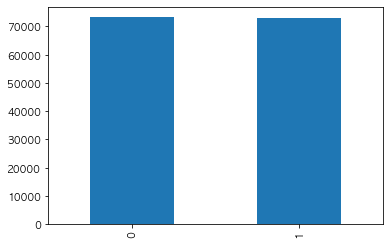

In [142]:
train_data['label'].value_counts().plot(kind = 'bar')

In [143]:
# null값 제거
train_data = train_data.dropna(how = 'any')
train_data.isnull().values.any()

False

In [144]:
len(train_data)

146182

In [146]:
'''특수문자 제거'''
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [147]:
# 리뷰 데이터기 비었다면 null로 변경
train_data['document'] = train_data['document'].str.replace('^ +', "")
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id            0
document    789
label         0
dtype: int64


In [149]:
# null데이터 제거
train_data = train_data.dropna(how = 'any')
len(train_data)

145393

테스트 데이터

In [154]:
# 중복 확인
test_data['document'].nunique(), test_data['label'].nunique()

# 중복 제거
test_data.drop_duplicates(subset=['document'], inplace=True)

#test_data['label'].value_counts().plot(kind = 'bar')

test_data = test_data.dropna(how = 'any')

### 특수문자 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

# 리뷰 데이터기 비었다면 null로 변경
test_data['document'] = test_data['document'].str.replace('^ +', "")
test_data['document'].replace('', np.nan, inplace=True)

# null데이터 제거
test_data = test_data.dropna(how = 'any')
len(test_data)

48389

Tokenize

In [155]:
'''불용어 정리'''
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [156]:
okt = Okt()

In [159]:
# train data 토큰화
X_train = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = han.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

  5%|▍         | 6888/145393 [00:12<03:53, 594.17it/s]java.lang.ArrayIndexOutOfBoundsException: Index 2046 out of bounds for length 2046
	at kr.ac.kaist.swrc.jhannanum.plugin.MajorPlugin.MorphAnalyzer.ChartMorphAnalyzer.MorphemeChart.addMorpheme(MorphemeChart.java:191)
	at kr.ac.kaist.swrc.jhannanum.plugin.MajorPlugin.MorphAnalyzer.ChartMorphAnalyzer.MorphemeChart.analyzeUnknown(MorphemeChart.java:451)
	at kr.ac.kaist.swrc.jhannanum.plugin.MajorPlugin.MorphAnalyzer.ChartMorphAnalyzer.MorphemeChart.analyze(MorphemeChart.java:257)
	at kr.ac.kaist.swrc.jhannanum.plugin.MajorPlugin.MorphAnalyzer.ChartMorphAnalyzer.ChartMorphAnalyzer.processEojeol(ChartMorphAnalyzer.java:133)
	at kr.ac.kaist.swrc.jhannanum.plugin.MajorPlugin.MorphAnalyzer.ChartMorphAnalyzer.ChartMorphAnalyzer.morphAnalyze(ChartMorphAnalyzer.java:158)
	at kr.ac.kaist.swrc.jhannanum.hannanum.Workflow.analyzeInSingleThread(Workflow.java:825)
	at kr.ac.kaist.swrc.jhannanum.hannanum.Workflow.analyze(Workflow.java:521)
	at kr.luc

In [160]:
print(X_train[:3])

[['아', '더빙', '진짜', '짜증나', '네', '요', '목소리'], ['흠포스터보', '고', '초딩영화줄오버연기조차', '가볍', '지', '않', '구나'], ['너무재밓었다그래서보는것을추천한다']]


In [161]:
# test data 토큰화
X_test = []
for sentence in tqdm(test_data['document']):
    tokenized_sentence = han.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|██████████| 48389/48389 [01:26<00:00, 556.85it/s]


In [162]:
print(X_test[:3])

[['굳', 'ㅋ'], ['뭐', '야', '평점들', '나쁘진', '않', '지', '말', 'ㄴ', '점', '짜', '리는', '더더욱', '아니', '잖아'], ['지루', '하', '어', '지', '않', '데', '완전', '막장', 'ㅁ', '돈주', '고', '보기', '에는']]


In [163]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [164]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

In [165]:
# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

In [167]:
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 178333
등장 빈도가 2번 이하인 희귀 단어의 수: 155362
단어 집합에서 희귀 단어의 비율: 87.11904134400251
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 9.808783064473907


In [168]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 22972


In [169]:
# 제거한 결과를 tokenizer로 넘김
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [170]:
print(X_train[:3])

[[9, 566, 35, 437, 30, 24, 651], [3, 575, 11, 36, 499], []]


In [171]:
# 학습을 위한 label 데이터를 따로 저장
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [175]:
# 위에서 등장빈도 2 이하 단어로만 이루어져 비어버린 되어버린 샘플 제거
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [176]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train), len(y_train))

139598 139598


최대 길이 : 72
평균 길이 : 11.106018710869783


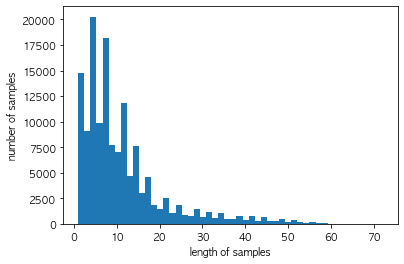

In [178]:
# 샘플 길이를 동일하게 맞춰주는 작업을 위한 전체 데이터 길이 분포 확인
print('최대 길이 :',max(len(l) for l in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [179]:
# max_len이하인 데이터의 비율 확인 함수
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [180]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 93.78787661714352


In [204]:
# 전체 샘플 길이 max_len으로 맞춤
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [205]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import tensorflow as tf

In [206]:
embedding_dim = 100
hidden_units = 128

In [198]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

In [207]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [208]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [209]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         2297200   
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,414,577
Trainable params: 2,414,577
Non-trainable params: 0
_________________________________________________________________


In [210]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/50


2022-06-06 00:48:35.948063: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-06 00:48:37.285798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-06 00:48:37.678086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-06 00:48:39.830303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1745/1745 [==============================] - ETA: 0s - loss: 0.4418 - acc: 0.7890

2022-06-06 00:49:23.979192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-06 00:49:24.041998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.81246, saving model to best_model.h5
1745/1745 [==============================] - 52s 27ms/step - loss: 0.4418 - acc: 0.7890 - val_loss: 0.4071 - val_acc: 0.8125
Epoch 2/50
1743/1745 [============================>.] - ETA: 0s - loss: 0.3778 - acc: 0.8307
Epoch 2: val_acc improved from 0.81246 to 0.82285, saving model to best_model.h5
1745/1745 [==============================] - 45s 26ms/step - loss: 0.3778 - acc: 0.8306 - val_loss: 0.3890 - val_acc: 0.8229
Epoch 3/50
1744/1745 [============================>.] - ETA: 0s - loss: 0.3474 - acc: 0.8476
Epoch 3: val_acc improved from 0.82285 to 0.82901, saving model to best_model.h5
1745/1745 [==============================] - 46s 26ms/step - loss: 0.3475 - acc: 0.8476 - val_loss: 0.3766 - val_acc: 0.8290
Epoch 4/50
1744/1745 [============================>.] - ETA: 0s - loss: 0.3247 - acc: 0.8600
Epoch 4: val_acc improved from 0.82901 to 0.83055, saving model to best_model.h5
1745/1745 [=============

In [212]:
model.save('best_model.h5')

In [213]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

1513/1513 [==============================] - 14s 9ms/step - loss: 0.4258 - acc: 0.8151
정확도 : 0.8151


In [214]:
loss, acc = model.evaluate(X_train, y_train, verbose=2)

4363/4363 - 34s - loss: 0.2638 - acc: 0.8893 - 34s/epoch - 8ms/step


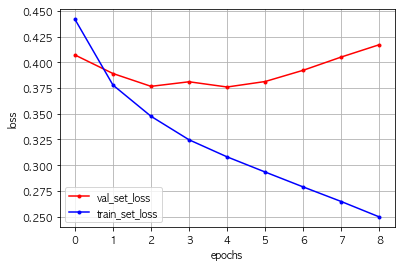

In [215]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.savefig('LSTM_loss_1112.png')

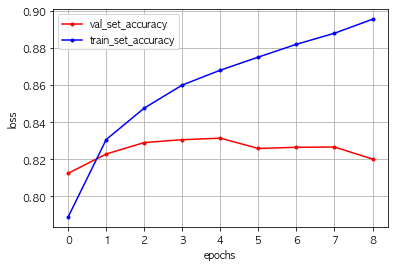

In [217]:
y_vloss = history.history['val_acc']
y_loss = history.history['acc']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_accuracy')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.savefig('LSTM_acc_1112.png')

In [222]:
def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(model.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정적입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정적입니다.\n".format((1 - score) * 100))

In [219]:
sentiment_predict("정말 재미있어요")

2022-06-06 00:56:43.616609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-06 00:56:43.813096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


78.46% 확률로 긍정 리뷰입니다.



In [225]:
sentiment_predict(body_list[1])

86.66% 확률로 부정적입니다.



In [226]:
body_list[1]

'삼성전자 지분 0 25 JP모건 보유 공시 삼성家 상속세 마련 위해 지분 매각 JP모건체이스그룹이 고 故 이건희 삼성그룹 회장의 부인인 홍라희 전 리움미술관장이 상속세 납부 재원을 위해 매각한 삼성전자 지분을 매입한 것으로 나타났다 5일 삼성전자에 따르면 JP모건체이스그룹이 영국에 설립한 투자은행 JP모건시큐리티즈PLC는 특수관계자와 함께 지난달 29일 기준 삼성전자 지분 0 25 1천720만7천11주 를 보유하고 있다 JP모건시큐리티즈PLC는 삼성전자 지분 보유목적을 단순투자 라고 밝혔다 삼성 홍라희 리움 전 관장 사진 삼성 JP모건시큐리티즈PLC는 지난달 28일 1천731만7천330주를 처음 보유하게 됐으며 이후 일부 매각해 1천685만355주를 갖고 있다 특수관계자인 JP모건GT코퍼레이션은 35만주를 갖고 있으며 JP모건시큐리티즈LLC와 JP모건체이스뱅크도 각각 6천851주 775주를 보유했다 JP모건시큐리티즈PLC의 삼성전자 지분은 지난달 홍라희 전 관장이 매각한 것으로 보인다 앞서 KB국민은행은 지난달 24일 1조3천억원에 달하는 삼성전자 주식 1천994만1천860주를 기관투자자를 상대로 시간 외 대량매매 블록딜 했다 삼성 오너 일가는 2020년 10월 이건희 삼성전자 회장 별세로 인한 상속세를 납부하기 위해 잇따라 주식 처분에 나섰다 상속세 분할 납부는 이달 29일부터 시작된다 앞서 지난달 22일 이부진 호텔신라 사장과 이서현 삼성복지재단 이사장도 각각 삼성SDS 지분 301만8천860주 3 9 를 블록딜로 처분해 1천900여억원을 확보했다 업계 관계자는 상속세 납부를 위해 삼성 오너가가 지분을 매각하는 것으로 알고 있다 며 추가 매도 가능성도 있다 고 말했다 '

In [ ]:
sentiment_predict(body_list[1])

In [238]:
for i in body_list[2:]:
    print("\n")
    sentiment_predict(i)
    print("\n")
    print(i)



72.26% 확률로 긍정적입니다.



모니터 교체 어린이집 신축 교육과정 확대 등 삼성전자 임직원 요청에 직접 답변 한종희 삼성전자 디바이스경험 DX 사업부문장 부회장 이 연일 임직원들과 적극적인 소통에 나서 주목 받고 있다 5일 삼성전자에 따르면 한 부회장은 전날 오후 임직원들에게 안녕하십니까 JH입니다 란 제목의 이메일을 보냈다 JH 는 한 부회장이 지난 1일 삼성전자 수원 본사에서 진행된 타운홀 미팅에서 언급한 자신의 호칭이다 한종희 삼성전자 DX부문장 부회장 사진 삼성전자 한 부회장이 이메일을 보낸 것은 타운홀 미팅 당시 임직원들이 건의한 내용에 대해 직접 답변하기 위해서다 당시 임직원들은 보행 중 휴대전화 사용 금지와 사내 어린이집 입소 대기 사내 외국어 교육 확대 등을 건의한 바 있다 삼성전자 관계자는 한 부회장이 사내 이메일로 소통에 나선 것은 작년 연말 부회장이 되고 나서 처음 이라며 정기적은 아니지만 타운홀 미팅 소규모 간담회 등 여러 소통 활동에 나설 것이라는 내용도 담겨 있다 고 말했다 한 부회장은 이메일을 통해 사업부별 직무별로 다른 업무용 모니터 종류를 표준화하겠다고 약속했다 또 최근 5분 만에 신청이 마감될 정도로 인기 있는 사내 외국어 교육 프로그램 기회도 확대하겠다고 강조했다 각 사업장마다 실내체육관 광주 다목적홀 구미 어린이집 수원 등 편의시설을 추가 신축하겠다는 내용도 포함됐다 삼성전자가 자체적으로 시행 중인 사내 휴대전화 사용 금지 조항을 개선하겠다는 내용도 담겼다 사내 위험지역을 제외한 일반적인 곳에서는 허용하겠다는 방침이다 한 부회장은 우리 회사를 한 마디로 표현하라고 하면 변화하는 회사 사람을 중시하는 회사 라고 대답할 것 이라며 임직원 역량과 열정을 한 방향으로 모으고 마음껏 발산할 수 있도록 저를 포함한 경영진들이 함께 노력하겠다 고 강조했다 


94.64% 확률로 부정적입니다.



한종희 삼성전자 대표이사 부회장 DX부문장 이 지난달 16일 오전 경기도 수원컨벤션센터에서 열린 제53기 삼성전자 정기주주총회에